In [1]:
 # import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading data

df = pd.read_csv("D:/Python/Luke Barousse course/Python-for-Data-Analysis/20_Pandas/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

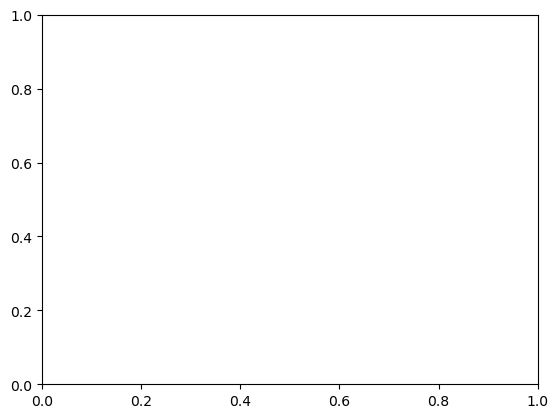

In [2]:
fig, ax = plt.subplots()

In [3]:
df['job_title_short'].value_counts()

Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: job_title_short, dtype: int64

<Axes: >

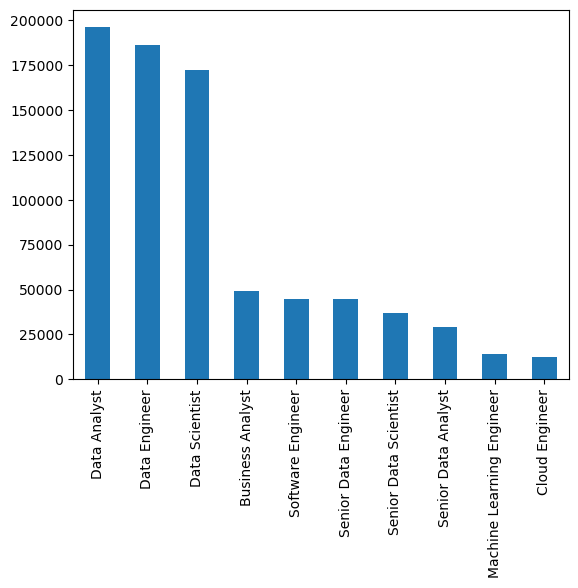

In [4]:
df['job_title_short'].value_counts().plot(kind='bar')

In [7]:
df['job_schedule_type'].value_counts().head(3)

Full-time     701727
Contractor     34793
Internship      8742
Name: job_schedule_type, dtype: int64

In [ ]:
# we want to put both bar charts on the same figure

fig, ax = plt.subplots(1,2) # 1 is the number of rows and 2 is the number of columns
df['job_title_short'].value_counts().plot(kind='bar', ax=ax) #we need to specify the index of the ax we are using
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax)

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

<Axes: >

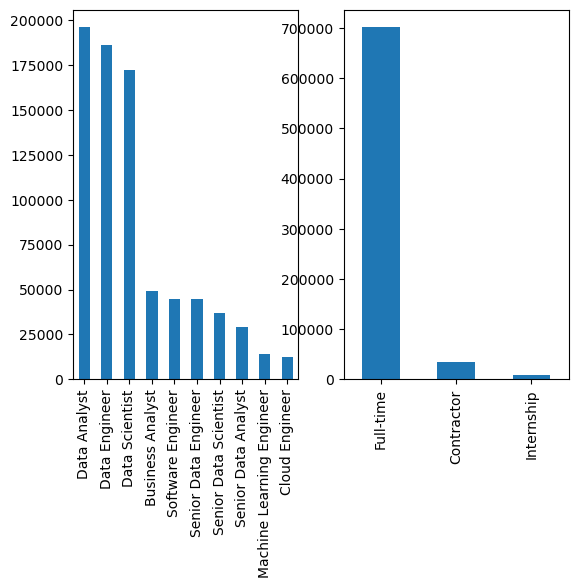

In [10]:
fig, ax = plt.subplots(1,2) 
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0]) 
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

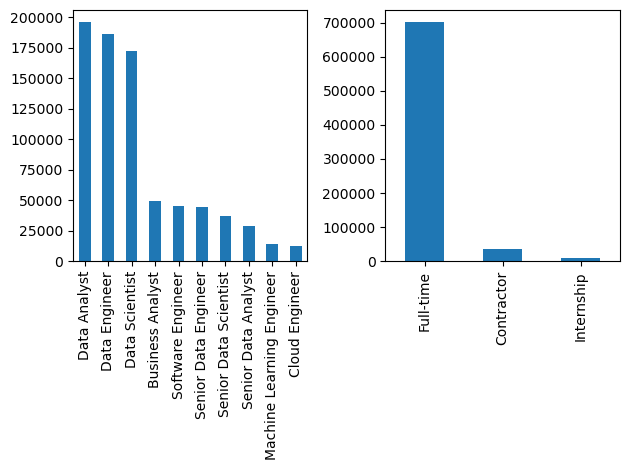

In [11]:
# we have some overlapping text
# we can use a function 'tight layout' that we want to apply to the entire figure

fig, ax = plt.subplots(1,2) 
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0]) 
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout()


#### Example - Counts of Top Skills in Job Postings

In [12]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [13]:
# we want to show skills for Data Scientists, Data Engineers, and Data Analyst
# we're going to put them in a list so we can loop through them and plot them individually on our figure

job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']


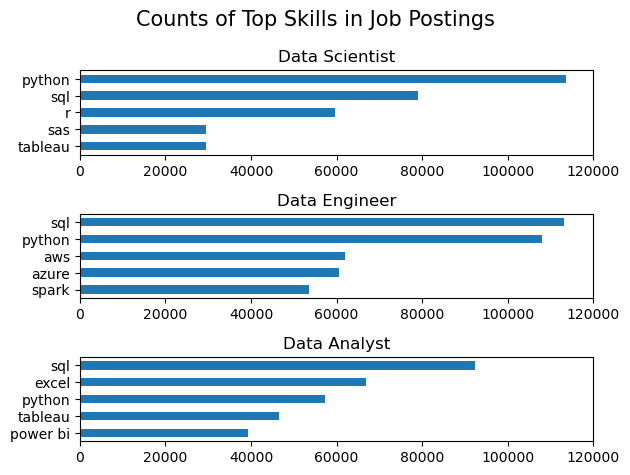

In [30]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    # we want to set the y axis so they all have the same values
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
               